# 1. Текстовое описание выбранного набора данных

Данный набор данных содержит информацию о самых популярных песнях в Spotify за 2024 год. 

Он предоставляет всесторонний обзор характеристик и показателей каждой песни, включая название, имя исполнителя, название альбома, дату выпуска, международный стандартный код записи (ISRC), рейтинг, оценку трека, количество прослушиваний в Spotify, количество включений в плейлисты, охват плейлистов Spotify, популярность в Spotify, количество просмотров на YouTube, количество лайков на YouTube, количество публикаций в TikTok, количество лайков в TikTok, количество просмотров в TikTok, охват плейлистов YouTube, количество плейлистов Apple Music, частоту воспроизведения на AirPlay, частоту воспроизведения на SiriusXM, количество плейлистов Deezer, охват плейлистов Deezer, количество плейлистов Amazon Music, потоки Pandora, радиостанции Pandora, потоки Soundcloud, количество распознаваний Shazam, популярность в TIDAL и указание на наличие откровенного (explicit) контента. 

Этот датасет позволяет анализировать тенденции в музыке, сравнивать популярность песен на различных платформах и исследовать взаимосвязь между характеристиками исполнителя и успехом песни.

# 2. Основные характеристики датасета.

In [28]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

In [29]:
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding="ISO-8859-1")
df.head() # Первые 5 строк датасета

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [30]:
# Размер датасета - 4600 строк (записей о песнях) и 29 столбцов (характеристик песен).
df.shape

(4600, 29)

In [31]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4600


In [32]:
# Список колонок
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [33]:
# Список колонок с типами данных
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [34]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Track - 0
Album Name - 0
Artist - 5
Release Date - 0
ISRC - 0
All Time Rank - 0
Track Score - 0
Spotify Streams - 113
Spotify Playlist Count - 70
Spotify Playlist Reach - 72
Spotify Popularity - 804
YouTube Views - 308
YouTube Likes - 315
TikTok Posts - 1173
TikTok Likes - 980
TikTok Views - 981
YouTube Playlist Reach - 1009
Apple Music Playlist Count - 561
AirPlay Spins - 498
SiriusXM Spins - 2123
Deezer Playlist Count - 921
Deezer Playlist Reach - 928
Amazon Playlist Count - 1055
Pandora Streams - 1106
Pandora Track Stations - 1268
Soundcloud Streams - 3333
Shazam Counts - 577
TIDAL Popularity - 4600
Explicit Track - 0


In [35]:
# Основные статистические характеристки набора данных
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [36]:
df.isnull().sum().sort_values(ascending = False)
# Создает DataFrame, где True обозначает пропущенные значения (NaN), а False - не пропущенные
# Вывод этого кода показывает, в каких столбцах больше всего пропущенных данных. 

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
All Time Rank                    0
Track Score                      0
ISRC                             0
Track                            0
Album Name                       0
Release Date                     0
Explicit Track      

In [37]:
df.drop(['TIDAL Popularity','Soundcloud Streams'], axis = 1, inplace = True)
df.columns
# Столбцы ‘TIDAL Popularity’ и ‘Soundcloud Streams’ были удалены, 
# так как содержали значительное количество пропущенных значений, что могло повлиять на результаты анализа.

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [38]:
df = df.map(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df
# Для корректного преобразования данных в числовой формат были удалены запятые из строковых значений

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,390470936,30716,196631588,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,323703884,28113,174597137,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,601309283,54331,211607669,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2031280633,269802,136569078,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,107034922,7223,151469874,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,4585,19.4,305049963,65770,5103054,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,4575,19.4,52282360,4602,1449767,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,4571,19.4,189972685,72066,6704802,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,4591,19.4,145467020,14037,7387064,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


In [39]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%m/%d/%Y')
# Преобразуем столбец с датами из строкового формата в формат datetime64[ns], 
# что позволяет выполнять операции с датами (например, извлекать год или месяц).
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
#  Создаем новые столбцы ‘Year’ и ‘Month’, содержащие год и месяц выпуска песни.

In [40]:
df.duplicated().sum() # Определяем количество дубликатов в датафрейме.

np.int64(2)

In [41]:
df = df.drop_duplicates(keep = 'first') #Удаляем дубликаты, сохраняя первое вхождение.
df.duplicated().sum()

np.int64(0)

In [44]:
for x in df.columns[6:]:
    df.loc[:,x] = pd.to_numeric(df[x])
    print(df[x].dtype)
# Преобразуем все столбцы, начиная с индекса 6 (‘Track Score’), которые должны быть числовыми, в числовой формат.

float64
object
object
object
float64
object
object
object
object
object
object
float64
object
object
float64
object
float64
object
object
object
int64
int32
int32


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   object        
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4485 non-null   object        
 8   Spotify Playlist Count      4528 non-null   object        
 9   Spotify Playlist Reach      4526 non-null   object        
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   object        
 1

#### Теперь видно, что большинство столбцов имеют правильные типы данных, а пропусков стало меньше.

# 3. Визуальное исследование датасета

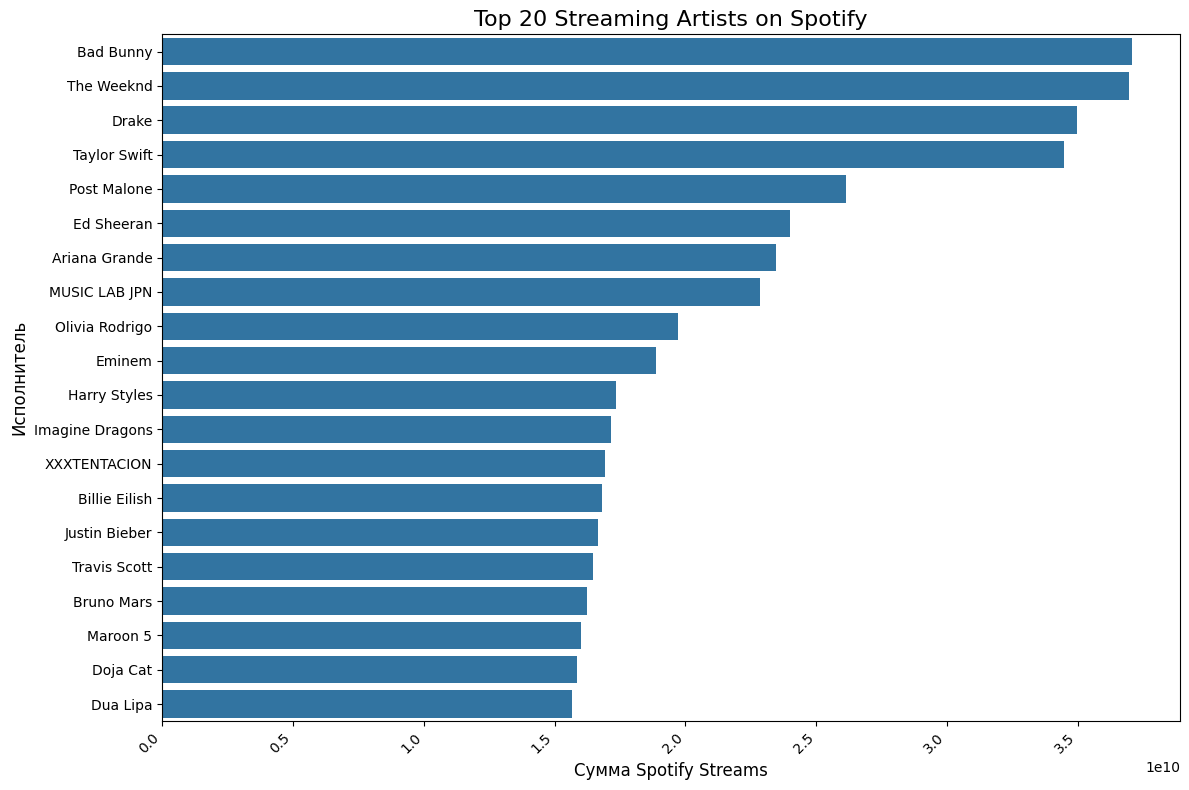

In [52]:
try:
    top_20_spotify_artists = df.groupby('Artist', as_index=False)['Spotify Streams'].sum()
    top_20_spotify_artists = top_20_spotify_artists.sort_values('Spotify Streams', ascending=False).head(20)
    plt.figure(figsize=(12, 8)) 
    sns.barplot(y='Artist', x='Spotify Streams', data=top_20_spotify_artists)
    plt.title('Top 20 Streaming Artists on Spotify', fontsize=16)  # размер заголовка
    plt.xlabel('Сумма Spotify Streams', fontsize=12)
    plt.ylabel('Исполнитель', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # компоновка графика
    plt.show()
except (KeyError, TypeError, ValueError) as e:
    print(f"Ошибка при построении графика Top 20 Artists on Spotify: {e}")

Данный график отображает топ-20 исполнителей по суммарному количеству прослушиваний на Spotify. Мы видим, что Bad Bunny является самым популярным исполнителем на Spotify, The Weeknd- на 2м месте и так далее.

Text(0.5, 1.0, 'Top 20 Streaming Songs on Spotify')

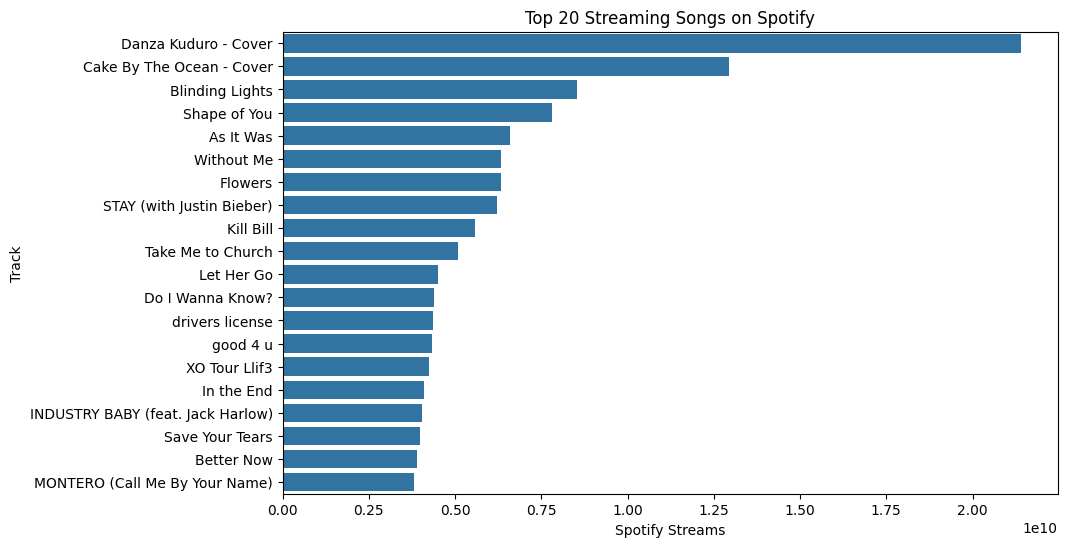

In [48]:
top_20_spotify_tracks = df.groupby('Track', as_index = False)['Spotify Streams'].sum()
top_20_spotify_tracks = top_20_spotify_tracks.sort_values('Spotify Streams', ascending = False).head(20)
top_20_spotify_tracks = top_20_spotify_tracks.dropna(subset=['Spotify Streams', 'Track'])

plt.figure(figsize = (10,6))
sns.barplot(y = 'Track', x = 'Spotify Streams', data = top_20_spotify_tracks)
plt.title('Top 20 Streaming Songs on Spotify')

Данный график отображает топ-20 прослушиваемых песен на Spotify. Мы видим, что Danza Kuduro - Cover является самой популярной песней на Spotify, и тд.

Text(0.5, 1.0, 'Top 20 Streaming Artists on YouTube')

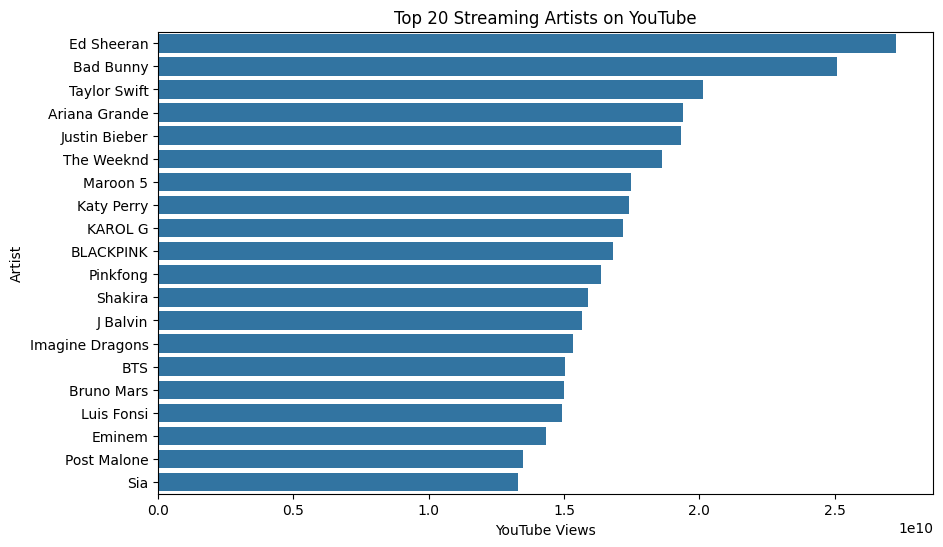

In [54]:
top_20_youtube_artists = df.groupby('Artist', as_index = False)['YouTube Views'].sum()
top_20_youtube_artists = top_20_youtube_artists.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Artist', data = top_20_youtube_artists)
plt.title('Top 20 Streaming Artists on YouTube')

Данный график отображает топ-20 исполнителей по суммарному количеству прослушиваний на YouTube. Мы видим, что Ed Sheeran является самым популярным исполнителем на YouTube, The Bad Bunny - на 2м месте и так далее.

Text(0.5, 1.0, 'Top 20 Streaming Songs on YouTube')

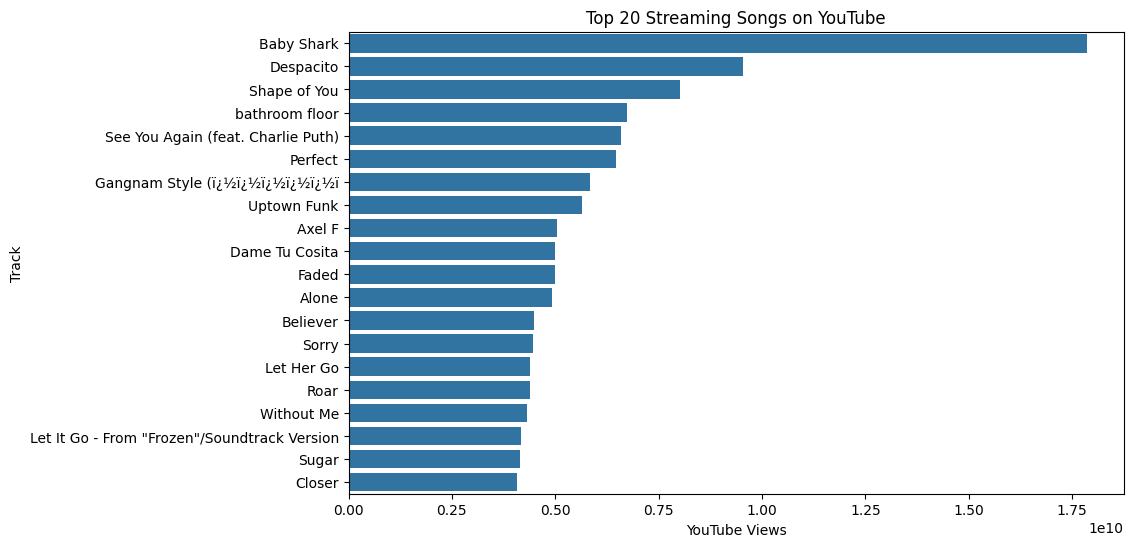

In [55]:
top_20_youtube_tracks = df.groupby('Track', as_index = False)['YouTube Views'].sum()
top_20_youtube_tracks = top_20_youtube_tracks.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Track', data = top_20_youtube_tracks)
plt.title('Top 20 Streaming Songs on YouTube')

In [ ]:
Данный график отображает топ-20 прослушиваемых песен на YouTube. Мы видим, что Baby Shark является самой популярной песней на YouTube, и тд.

Text(0.5, 0, 'Year')

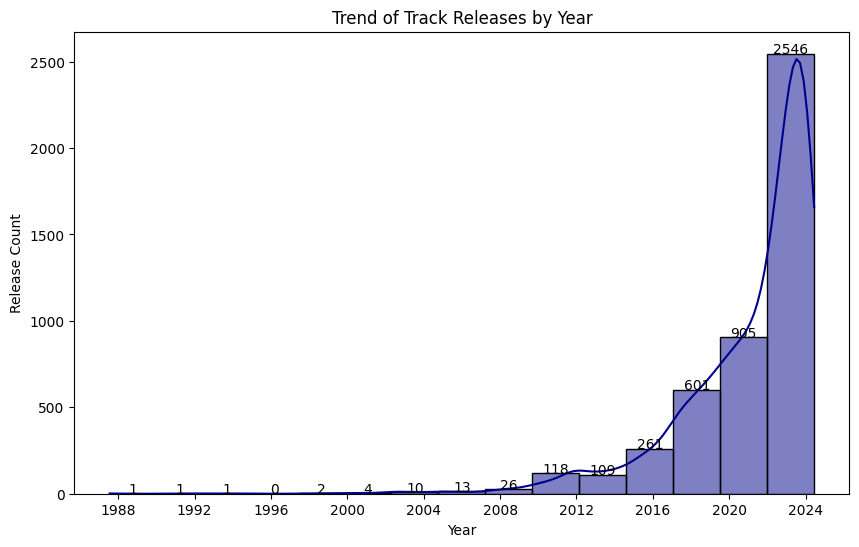

In [51]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(df['Release Date'], bins = 15, kde = True, color = 'darkblue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha = "center")


plt.title('Trend of Track Releases by Year')
plt.ylabel('Release Count')
plt.xlabel('Year')

Гистограмма показывает распределение релизов треков по годам. Видно, что наибольшее количество треков было выпущено в районе 2022-2024.

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

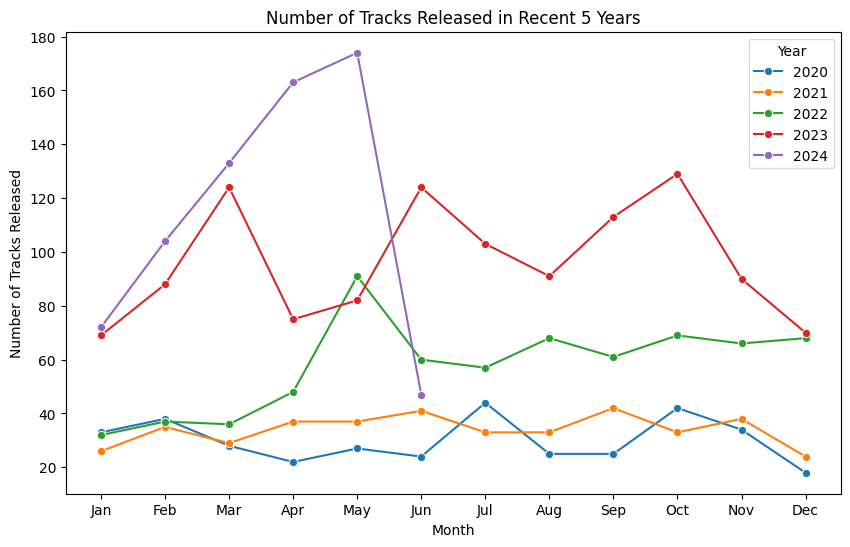

In [52]:
import calendar

plt.figure(figsize = (10,6))

monthly_releases = df.groupby(['Year','Month']).size().reset_index(name = "Count")
recent_years = monthly_releases.Year.unique()[-5:]
recent_data = monthly_releases[monthly_releases['Year'].isin(recent_years)]

ax = sns.lineplot(data=recent_data, x='Month', y='Count', hue='Year', palette='tab10', marker = 'o')
plt.title('Number of Tracks Released in Recent 5 Years')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')

month_names = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

Линейный график показывает количество треков, выпущенных в последние 5 лет по месяцам. Видно, что весной наблюдается пик релизов, а в декабре - спад. Сравнение линий разных цветов позволяет увидеть, как эти тенденции меняются год от года.

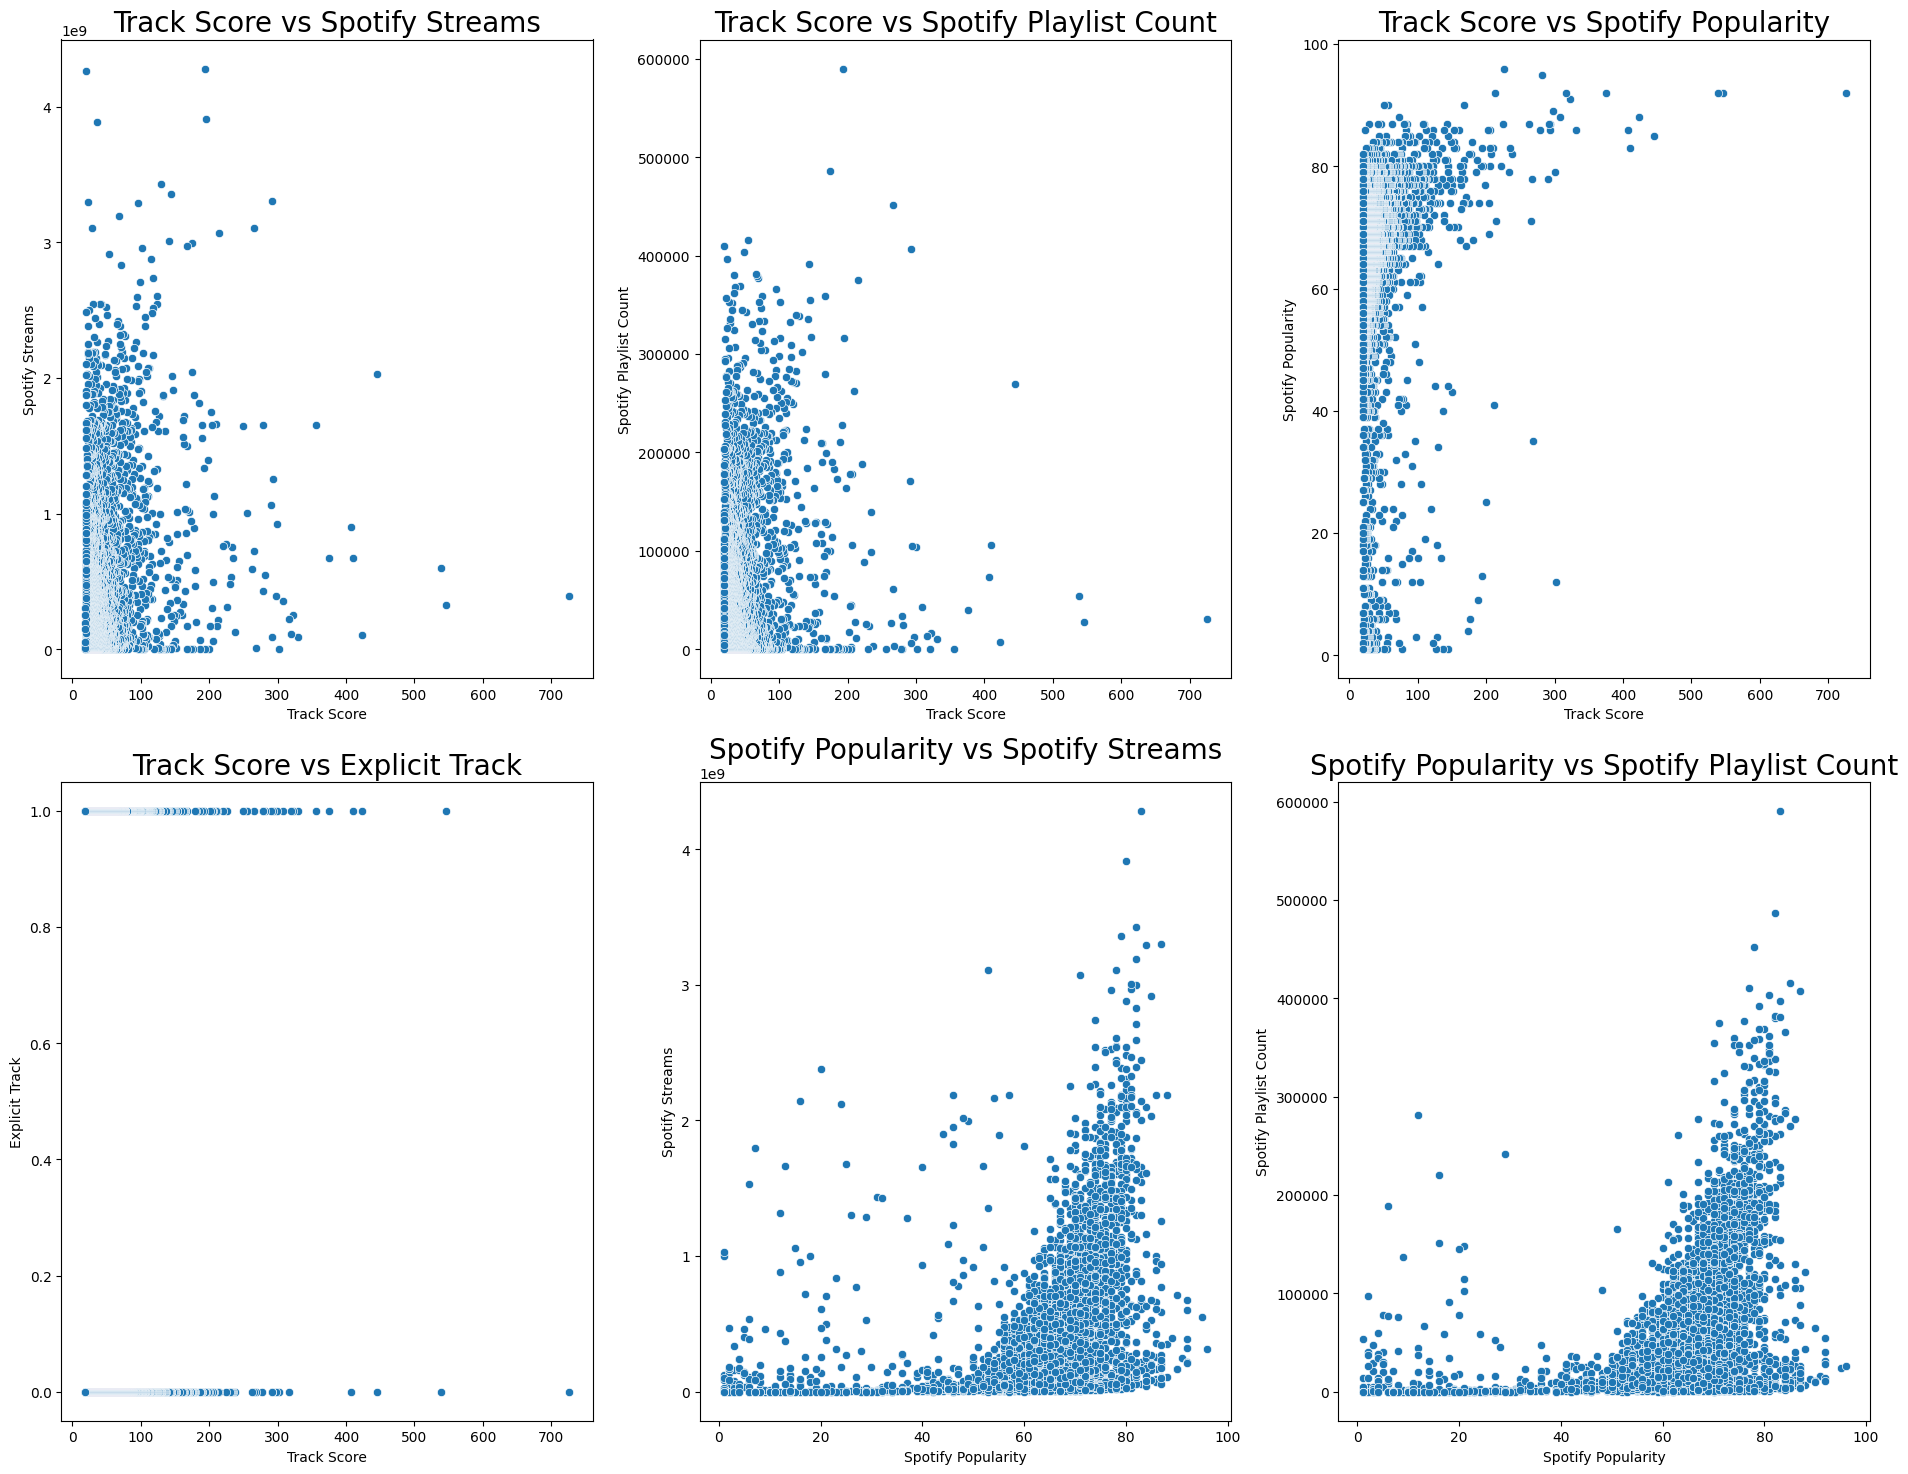

In [53]:
fig, ax = plt.subplots(figsize=(19,15),nrows=2,ncols=3)


sns.scatterplot(x='Track Score', y='Spotify Streams', data=df,ax=ax[0,0])
ax[0,0].set_xlabel('Track Score')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Track Score vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Playlist Count', data=df,ax=ax[0,1])
ax[0,1].set_xlabel('Track Score')
ax[0,1].set_ylabel('Spotify Playlist Count')
ax[0,1].set_title('Track Score vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Popularity', data=df,ax=ax[0,2])
ax[0,2].set_xlabel('Track Score')
ax[0,2].set_ylabel('Spotify Popularity')
ax[0,2].set_title('Track Score vs Spotify Popularity',fontsize=20)


sns.scatterplot(x='Track Score', y='Explicit Track', data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Track Score')
ax[1,0].set_ylabel('Explicit Track')
ax[1,0].set_title('Track Score vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Streams', data=df,ax=ax[1,1])
ax[1,1].set_xlabel('Spotify Popularity')
ax[1,1].set_ylabel('Spotify Streams')
ax[1,1].set_title('Spotify Popularity vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Playlist Count', data=df,ax=ax[1,2])
ax[1,2].set_xlabel('Spotify Popularity')
ax[1,2].set_ylabel('Spotify Playlist Count')
ax[1,2].set_title('Spotify Popularity vs Spotify Playlist Count',fontsize=20)


plt.tight_layout()
plt.show()

Набор диаграмм рассеяния позволяет оценить взаимосвязи между различными признаками. Например, на графике Track Score vs Spotify Streams можно увидеть, есть ли тенденция к увеличению количества прослушиваний с ростом оценки трека. Аналогично анализируются и другие графики. В частности, наблюдается положительная корреляция между “Spotify Popularity” и “Spotify Streams”, а также между “Spotify Popularity” и “Spotify Playlist Count”.

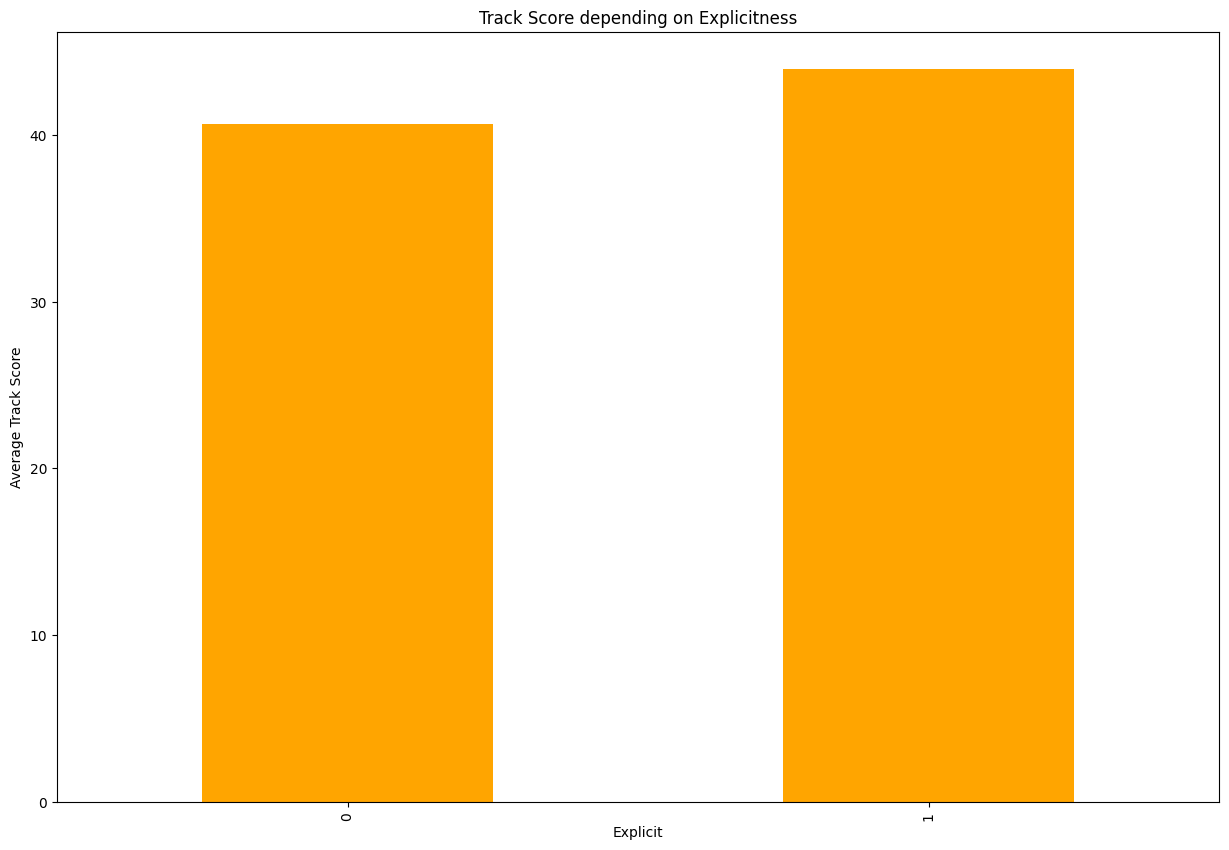

In [54]:
# Calculate the average 'Track Score' based on Explicitness
explicit_track_scores = df.groupby('Explicit Track')['Track Score'].mean()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()

Столбчатая диаграмма показывает среднюю оценку треков в зависимости от наличия откровенного контента. Видно, что средняя оценка треков с откровенным контентом ниже средней оценки треков без откровенного контента.

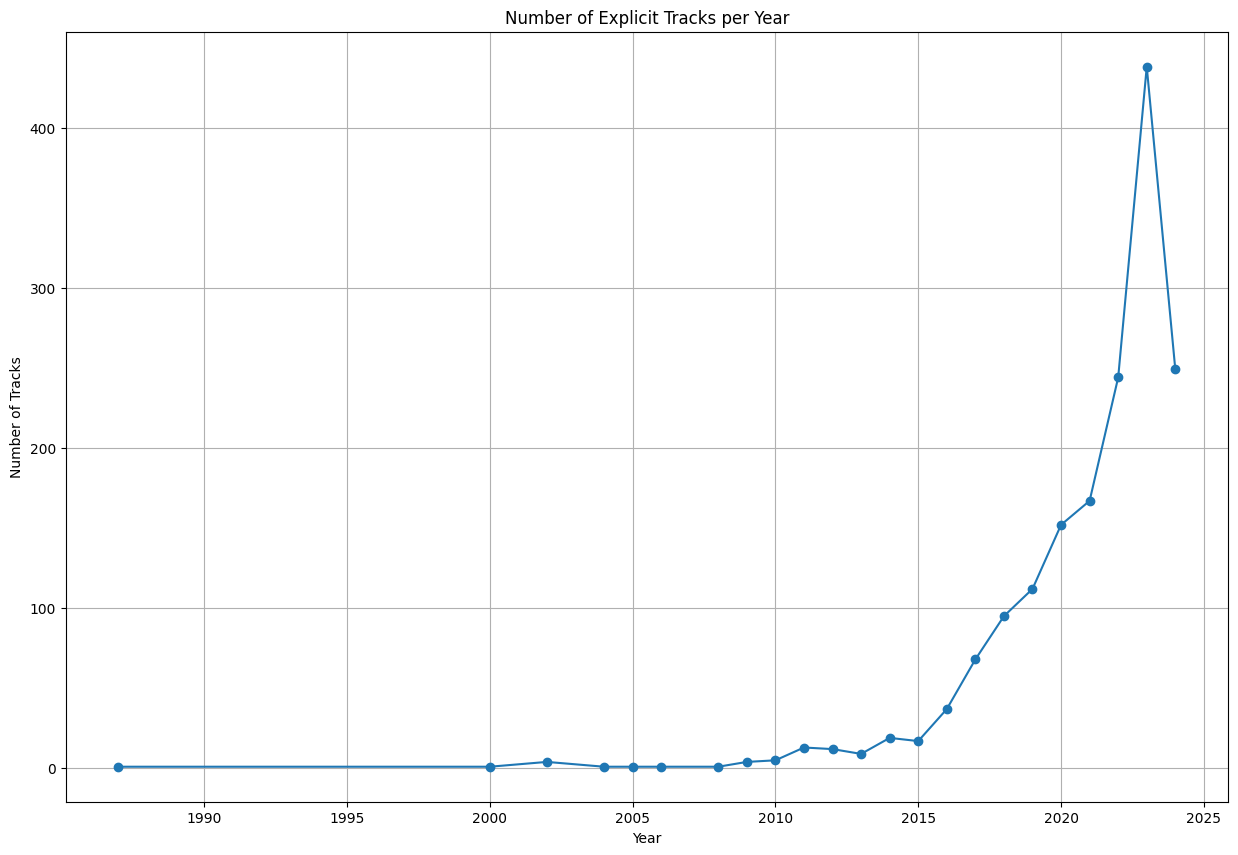

In [55]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
explicit_tracks = df[df['Explicit Track'] == 1]
explicit_tracks_per_year = explicit_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Explicit Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

Линейный график показывает количество треков с откровенным контентом по годам. Видно, что количество таких треков увеличивается с течением времени. В 2024 наблюдается пик в количестве треков с откровенным контентом.

# 4. Информация о корреляции признаков.

In [57]:
numerical_cols = [col for col in df.columns if df[col].dtype not in ['object', 'category', 'datetime64[ns]']]
numerical_cols

['Track Score',
 'Spotify Popularity',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Amazon Playlist Count',
 'Explicit Track',
 'Year',
 'Month']

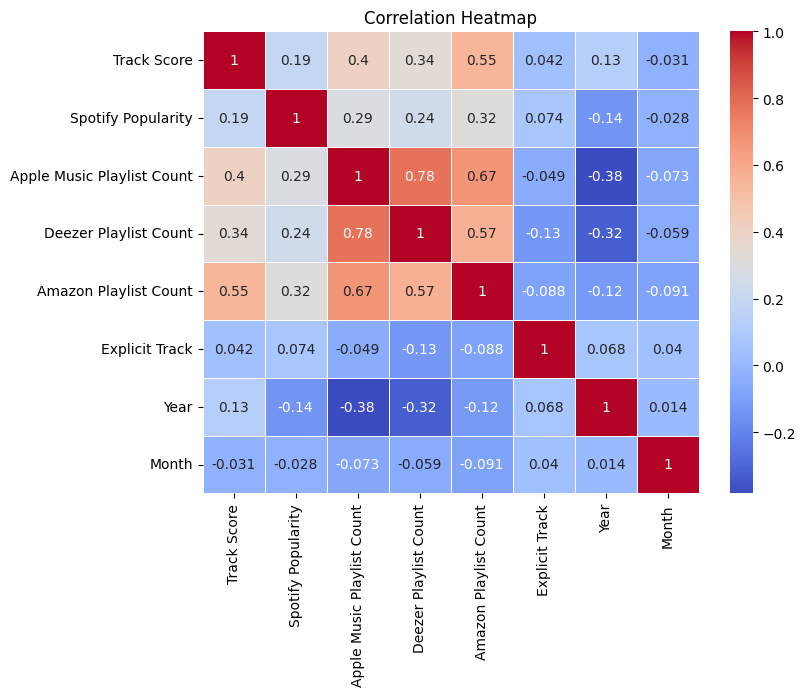

In [58]:
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Отрицательная корреляция между “Year” и “Apple Music Playlist Count” (-0.38) и “Year” и “Deezer Playlist Count” (-0.32)  говорит о том, что со временем (с увеличением года выпуска песни) количество плейлистов Apple Music и Deezer, в которые добавляется песня, имеет тенденцию уменьшаться. Положительная корреляция между “Track Score” и “Amazon Playlist Count” (0.55) говорит о том, что чем выше оценка трека, тем больше вероятность, что он будет добавлен в плейлисты Amazon Music. Сильная положительная корреляция между “Apple Music Playlist Count” и “Deezer Playlist Count” (0.78), “Apple Music Playlist Count” и “Amazon Playlist Count” (0.67), и “Deezer Playlist Count” и “Amazon Playlist Count” (0.57) указывает на то, что если песня часто добавляется в плейлисты на одной платформе (например, Apple Music), то она с большой вероятностью будет добавлена и в плейлисты на других платформах (Deezer и Amazon Music). Очень слабая корреляция между “Year” и “Track Score” (0.13) говорит о том, что год выпуска песни практически не влияет на ее оценку.